# Expérimentations 1


## Sommaire:

1. Résoudre un pb de Cauchy.
    - Graphiquement.
    - Symboliquement.

# 1. Résoudre y′ = y · sin(y) + sin(x) avec y(x = 0) = 2.

## Graphiquement

Le problème de Cauchy:
\begin{cases}
u'(x)=-3x^2u(x)+6x^2,\\
u(0)=4.
\end{cases}

In [40]:
# Import des libs
from scipy import *
from scipy.integrate import odeint #Pour résoudre l’équation différentielle
import matplotlib.pyplot as plt # Permet de tracer des graphes
import numpy as np
from math import *

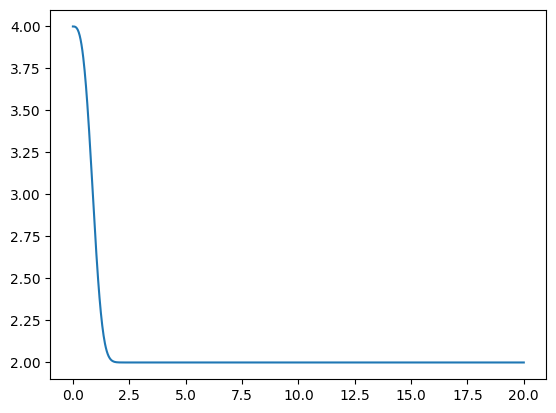

In [41]:

# Equation
def deriv (y,x) :
    # return y * sin( y ) + sin( x )
    return 6*x**2 - 3*x**2 * y

# Choix de l’ intervalle d’intégration
x0 = 0
xmax = 20
npoints = 1000
x = np.linspace ( x0 , xmax , npoints )

# Condition initiale
y0 = 4 # y(x0) = y0

solution = odeint ( deriv , y0 , x )
y = solution [ : , 0 ]

plt.plot ( x , y )
plt.show ( )

## Symboliquement

Le problème de Cauchy:
\begin{cases}
u'(x)=-3x^2u(x)+6x^2,\\
u(0)=4.
\end{cases}

## Etape 1 : Entrer l'EDO avec Sympy

In [42]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols
from sympy.abc import x
import sympy

x   = sympy.Symbol('x')
u   = sympy.Function('u')

left  = sympy.diff(u(x),x)

right = 6*x**2 - 3*x**2 * u(x)

edo = sympy.Eq( left , right )
display(edo)

Eq(Derivative(u(x), x), -3*x**2*u(x) + 6*x**2)

## Etape 2 : Afficher la solution générale

In [43]:
solgen = sympy.dsolve(edo,u(x)) 
display(solgen)

Eq(u(x), C1*exp(-x**3) + 2)

## Etape 3 : Prendre en compte les conditions initiale

In [44]:
x0 = 0
u0 = 4
consts = sympy.solve( sympy.Eq( u0, solgen.rhs.subs(x,x0)) , dict=True)[0]
consts

{C1: 2}

## Etape 4 : Solution avec les conditions initiales

In [45]:
solpar = solgen.subs(consts)
solpar

Eq(u(x), 2 + 2*exp(-x**3))

## Etape 5 : SOlution graphique

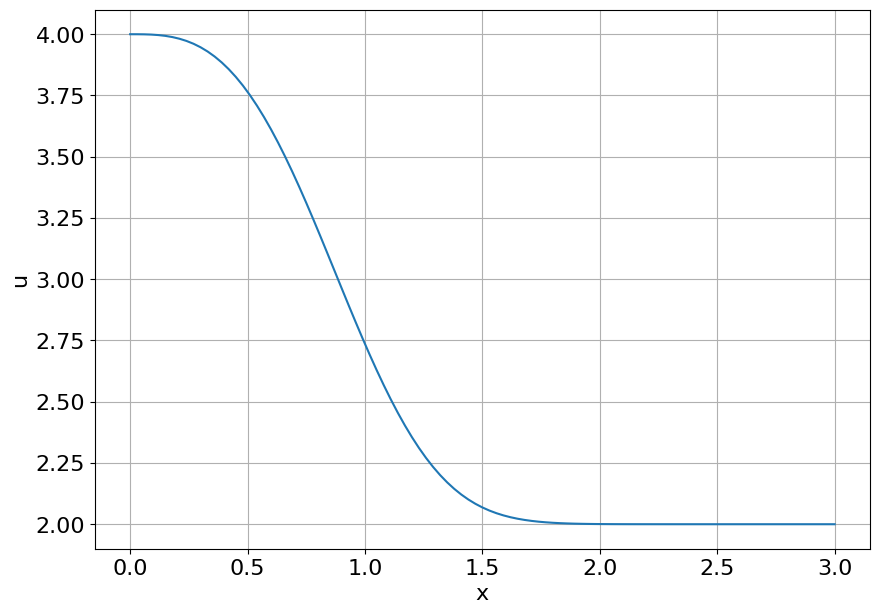

In [46]:
func = sympy.lambdify(x,solpar.rhs,'numpy')
from matplotlib.pylab import *
# rcdefaults()
rcParams.update({'font.size': 16})
figure(figsize=(10,7))
xx=linspace(0,3,101)
yy=func(xx)
plot(xx,yy)
xlabel('x')
ylabel('u')
grid()